# Introduction to NLP Fundamentals in TensorFlow (Natural Language Processing)


NLP has the goal of deriving information out of natural language (could be sequences, text or speech).

Another common name for NLP problems is sequence to sequence problems(seq2seq).






## Get helper functions


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import a series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-11-10 15:07:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-10 15:07:18 (96.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset is Kaggle's introduction to NLP dataset (text samples of tweets labelled as disaster or not disaster).

See original source here: https://www.kaggle.com/competitions/nlp-getting-started

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# unzip data
unzip_data("nlp_getting_started.zip")

--2023-11-10 15:07:22--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2023-11-10 15:07:22 (132 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualising a text dataset

To visualise out text samples, we first have to read them in. One way to do this would be with Python: https://realpython.com/read-write-files-python/

But others prefer to get visual straight away. Thus, another way is to use Pandas.


In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
#How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualise some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # Create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/e4wK8Uri8A

---

Target: 1 (real disaster)
Text:
Rly tragedy in MP: Some live to recount horror: ÛÏWhen I saw coaches of my train plunging into water I called ... http://t.co/xtlJz7BjgL

---

Target: 1 (real disaster)
Text:
Tennessee lesbian couple faked hate crime and destroyed own home with arsonÛ_ http://t.co/10mUEY8PXJ #Lesbian

---

Target: 0 (not real disaster)
Text:
Man Who Buried Dog Alive Thought No One Would Find Her But She Was Rescued Just In Time http://t.co/SahQ5UOAHW

---

Target: 0 (not real disaster)
Text:
#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/7enNulLKzM

---



### Split data into training and validation sets


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,# use 10% of training data for validation split
                                                                            random_state=42)

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
#Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

When dealing with a text problem, first thing to do before building a model is to convert text to numbers.

There are a few ways to do this:
* Tokenization - direct mapping of token (word or character) to number.
* Embedding - create a matrix of feature vectors for each token.(The size of the feature vector can be defined and this embedding can be learned).

### Text Vectorization (Tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [ ]:
# use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, #how many words in the vocabulary (automatically adds <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n-words?in this case will treat every word as 1 token
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None,#how long do you want your sequences to be
                                    pad_to_max_tokens=False)

In [ ]:
len(train_sentences[0].split())

7

In [ ]:
#Find the average number of tokens in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 #Max number of words to have in our vocabulary
max_length=15 #max length our sequences will be (e.g. how many words from a tweet does a model see)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
       \n\n Vectorized version:")
text_vectorizer([random_sentence])

Original text:
 you could slit my throat and I'd apologize for bleeding on you       

 Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  12,  137, 8405,   13, 4422,    7,  508,    1,   10,  587,   11,
          12,    0,    0,    0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # Get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # Get the most common words
bottom_5_words = words_in_vocab[-5:] # Get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding Layer

To make our embedding, we're going to use TensorFlow's Embedding Layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The most important parameters are :
* input_dim = the size of our vocabulary
* output_dim = the size of the output embedding vector(e.g. a value of a 100 would mean each token gets represented by a vector 100 long)
* input_length = length of sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, #set input shape
                             output_dim=128, #output shape
                             embeddings_initializer="uniform",
                             input_length=max_length) #how long is each input

embedding

In [ ]:
# Get random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\n Embedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed


Original text:
 I can't bloody wait!! Sony Sets a Date For Stephen KingÛªs Û÷The Dark TowerÛª #stephenking #thedarktower http://t.co/J9LPdRXCDE  @bdisgusting        

 Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01278884, -0.01304605,  0.01521115, ...,  0.03176988,
          0.03822316, -0.02352105],
        [-0.01850984, -0.02644446, -0.04926798, ...,  0.01529237,
          0.01971146,  0.04244221],
        [ 0.0395041 ,  0.02394852, -0.00693094, ...,  0.01757521,
         -0.00651015,  0.0057982 ],
        ...,
        [-0.01867346, -0.00723106,  0.01919531, ...,  0.01212692,
         -0.00674064, -0.01839751],
        [-0.00125844,  0.00342257,  0.02131373, ...,  0.02998808,
          0.00969906, -0.03373103],
        [ 0.00252582,  0.04538249, -0.00316326, ...,  0.03976827,
         -0.00875688, -0.01129556]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.01278884, -0.01304605,  0.01521115,  0.04517403, -0.04953931,
        -0.00318103, -0.0088374 , -0.01975219,  0.00063386, -0.00870051,
         0.02568832, -0.04896219, -0.00500394, -0.04685984,  0.01270287,
         0.04950341, -0.04530049,  0.03173121, -0.04661625, -0.04031609,
         0.02502051, -0.00444496, -0.01988665,  0.00852573, -0.04481533,
        -0.02759013,  0.04457394,  0.01958847,  0.0380129 , -0.01968172,
        -0.0484112 ,  0.01983467, -0.02631342, -0.03777852, -0.01269557,
         0.02671145,  0.01661361,  0.04584693, -0.0371616 , -0.01437986,
         0.0099121 ,  0.0234266 ,  0.00416176,  0.0264484 ,  0.01322499,
        -0.0067446 ,  0.04989232,  0.01856288,  0.04256257, -0.0288635 ,
         0.01248212,  0.04594779, -0.00652286, -0.02570854, -0.03036155,
        -0.01303321,  0.01073467,  0.02027771, -0.01398851,  0.03474206,
         0.00549775,  0.03149546, -0.02577119,  0.02718456, -0.04516779,
  

## Modelling a text dataset (running a series of experiments)

Now that we can turn our text sequences into numbers, we can start builing a series of modelling experiments.

We'll start with a baseline and then move on from there.

* Model 0: Naive Bayes(baseline) This is from sklearn ML map:https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* Model 1: Feed forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

We'll do this using the standard steps with TensorFlow:
1. Create a model
2. Build a model
3. Fit the model
4. Evaluate the model



### Model 0: Getting a baseline (benchmark for future experiments)

To do this we will use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

🔑**Note:** It's common practice to non-DL algorithms as a baseline because of their speed. Then later using DL to try to improve them.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


# Create tokenization and modelling pipeline
model_0 = Pipeline([
                   ("tfidf", TfidfVectorizer()), # Convert words to numbers using tfidf
                   ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

Let's create one to compare our model's predictions with truth labels using the following metrics:

* Accuracy
* Precision
* Recall
* F1-Score

For more info on evaluation metrics see: https://scikit-learn.org/stable/modules/model_evaluation.html


In [ ]:
# Function to evaluate: accuracy, precision, recall, and F1-score of a Binary Class model
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall, F1-score of a binary classification model.
  """
  #Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1-score using the "weighted" average
  model_precision, model_recall, model_f1, _ =  precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}

  return model_results


In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple Dense model

In [ ]:
# Create a tensorboard callback (new one for each model)
from helper_functions import create_tensorboard_callback

# create directory to save tensorboard logs
SAVE_DIR = "model_logs"

In [ ]:
#Build model with Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) #inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turns input text into numbers
x = embedding(x) #creates an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) #Condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation="sigmoid")(x) #creates output layer, wants binary outputs so use sigmoid activation function
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")


In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
#Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
#Fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20231110-150728
Epoch 1/5
215/215 [==============================] - 23s 77ms/step - loss: 0.6087 - accuracy: 0.6974 - val_loss: 0.5334 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4407 - accuracy: 0.8192 - val_loss: 0.4705 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3469 - accuracy: 0.8613 - val_loss: 0.4580 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.2845 - accuracy: 0.8899 - val_loss: 0.4676 - val_accuracy: 0.7940
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2375 - accuracy: 0.9111 - val_loss: 0.4801 - val_accuracy: 0.7940


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.7940


[0.4800920784473419, 0.7939632534980774]

In [ ]:
# Make some predictions and evaluate them
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape


24/24 [==============================] - 0s 2ms/step


(762, 1)

In [ ]:
# Look at a single prediction
model_1_pred_probs[0]

array([0.32419258], dtype=float32)

In [ ]:
#look at the first 10
model_1_pred_probs[:10]

array([[0.32419258],
       [0.7370046 ],
       [0.9976088 ],
       [0.10277152],
       [0.10212909],
       [0.93391913],
       [0.9075883 ],
       [0.9926076 ],
       [0.9604065 ],
       [0.26093078]], dtype=float32)

In [ ]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
# Calculate our model 1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 79.39632545931758,
 'precision': 0.8008676334812989,
 'recall': 0.7939632545931758,
 'f1': 0.7905507946950135}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([ True, False,  True,  True])

## Visualising learned embeddings


In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# Get weight matrix of embedding layer
#(these are the numerical representations of each token in our training data, which have been learned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape) #same size as vocab size and embedding_dim (output_dim of our embedding layer)


(10000, 128)


Now we've got the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, TensorFlow has a tool called projector: https://projector.tensorflow.org/

And TensorFlow also has a guide on word embeddings: https://www.tensorflow.org/text/guide/word_embeddings

Word2vec: https://jalammar.github.io/illustrated-word2vec/

In [ ]:
#Create embedding files (Got this from tensorflow word embeddings mentioned above)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from Colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks(RNNs)

RNNs are useful for sequence data.
The premise of an RNN is to use the representation of a previous input to aid the representation of a later input.

* If you want an overview of RNNs here's MIT sequence modelling lecture : https://www.youtube.com/watch?v=ySEx_Bqxvvo&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3

* And Chris Olah's LSTM RNN overview: https://colah.github.io/posts/2015-08-Understanding-LSTMs/

* And Andrej Karpathy unreasonable effectiveness of RNNs: https://karpathy.github.io/2015/05/21/rnn-effectiveness/

### Model 2: LSTM

LSTM = Long Short Term Memory (this is one of the most popular LSTM cells).

The structure of an RNN typically looks like this:

 Input (text) -> Tokenize -> Embedding -> Layers (RNNs/Dense) -> Output (label probability)

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.LSTM(units=64, return_sequences=True)(x) #When you're stacking RNN cells together, you need to set return_sequences=True
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation= "relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2=tf.keras.Model(inputs, outputs, name="model_2_LSTM")


In [ ]:
# get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20231110-150812
Epoch 1/5
215/215 [==============================] - 12s 39ms/step - loss: 0.2258 - accuracy: 0.9183 - val_loss: 0.5847 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1565 - accuracy: 0.9421 - val_loss: 0.6698 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1280 - accuracy: 0.9496 - val_loss: 0.6932 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1031 - accuracy: 0.9631 - val_loss: 0.7795 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0852 - accuracy: 0.9672 - val_loss: 0.8501 - val_accuracy: 0.7808


In [ ]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[6.4581726e-03],
       [7.8320032e-01],
       [9.9980992e-01],
       [7.9327241e-02],
       [6.5567350e-04],
       [9.9689263e-01],
       [7.5928450e-01],
       [9.9984694e-01],
       [9.9975091e-01],
       [4.5924622e-01]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 78.08398950131233,
 'precision': 0.7825889119713269,
 'recall': 0.7808398950131233,
 'f1': 0.7789136933207592}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

###Model 3: GRU  model

Another popular RNN component is the GRU or gated recurrent unit.

The GRU Cell has similar features to LSTM cell but has less parameters.

In [ ]:
#Build an RNN using the GRU cell:

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
#x = layers.GlobalAveragePooling1D()(x)
#x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
# Get a summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model

model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20231110-150834
Epoch 1/5
215/215 [==============================] - 10s 37ms/step - loss: 0.1595 - accuracy: 0.9342 - val_loss: 0.8105 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0823 - accuracy: 0.9693 - val_loss: 0.9245 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0738 - accuracy: 0.9723 - val_loss: 0.9403 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0607 - accuracy: 0.9750 - val_loss: 0.9933 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0531 - accuracy: 0.9762 - val_loss: 1.2306 - val_accuracy: 0.7730


In [ ]:
# Make some predictions
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[4.9058162e-04],
       [7.8093660e-01],
       [9.9981183e-01],
       [5.3399283e-02],
       [5.2370149e-05],
       [9.9948657e-01],
       [8.5367942e-01],
       [9.9994791e-01],
       [9.9985898e-01],
       [8.2873017e-01]], dtype=float32)

In [ ]:
#Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.29658792650919,
 'precision': 0.7759760952910788,
 'recall': 0.7729658792650919,
 'f1': 0.7702964374538457}

###Model 4: Bidirectional RNN model

Normal RNNs go from left to right. However, Bidirectional RNNs go from left to right AND from right to left.

In [ ]:
# Build a bidirectional RNN model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
# get summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [ ]:
# compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20231110-150857
Epoch 1/5
215/215 [==============================] - 14s 46ms/step - loss: 0.1084 - accuracy: 0.9645 - val_loss: 1.0168 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0547 - accuracy: 0.9781 - val_loss: 1.0403 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0458 - accuracy: 0.9796 - val_loss: 1.4699 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0413 - accuracy: 0.9790 - val_loss: 1.4467 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0405 - accuracy: 0.9810 - val_loss: 1.4700 - val_accuracy: 0.7533


In [ ]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[9.7580701e-01],
       [6.5310228e-01],
       [9.9997997e-01],
       [2.5236696e-01],
       [1.6089696e-05],
       [9.9983811e-01],
       [9.8724848e-01],
       [9.9998808e-01],
       [9.9997997e-01],
       [9.9858177e-01]], dtype=float32)

In [ ]:
#Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate results of our bidirectional model
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 75.32808398950131,
 'precision': 0.753004229734441,
 'recall': 0.7532808398950132,
 'f1': 0.7530956268877401}

## Convolutional neural networks for text (and other types of sequences)

Before we used CNNs for images, and they are typically 2D (height x width). However, our text data is 1D.

Previously we've used Conv2D for the image data, but now we will use Conv1D.

Typical structure for Conv1D model for sequences (in this case, text):

Inputs(text) -> Tokenization -> Embedding -> Layer(s)(typically Conv1D + pooling) -> Outputs (class probabilities)


### Model 5: Conv1D

For different explanations of parameters see:
* https://poloclub.github.io/cnn-explainer/ (used for 2D but can help explain 1D data too)
* Difference between "same" and "valid" padding: https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

In [ ]:
# Test out our embedding layer, Conv1D layer, and Max Pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["This is a test sentence"])) #Turn target sequence into embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5, #also referred to as an ngram of 5(meaning it looks at 5 words at a time)
                        strides=1, #default
                        activation="relu",
                        padding="valid") #Default = "valid", the output is smaller than the input shape, & "same" means output is same shape as input

conv_1d_output = conv_1d(embedding_test) #pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) #equivalent to "get the most important feature" or "get feature with highest value"


embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
#embedding_test

In [ ]:
#conv_1d_output

In [ ]:
#max_pool_output

In [ ]:
# create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5,strides=1, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

In [ ]:
#get summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Compile model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
# Fit model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20231110-150926
Epoch 1/5
215/215 [==============================] - 11s 41ms/step - loss: 0.1205 - accuracy: 0.9596 - val_loss: 0.9566 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0750 - accuracy: 0.9731 - val_loss: 1.0254 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0587 - accuracy: 0.9777 - val_loss: 1.1594 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0549 - accuracy: 0.9771 - val_loss: 1.1579 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0507 - accuracy: 0.9788 - val_loss: 1.2579 - val_accuracy: 0.7546


In [ ]:
# Create predictions on our model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[2.2776397e-01],
       [5.6984514e-01],
       [9.9996996e-01],
       [5.9373897e-02],
       [1.2815947e-07],
       [9.9027562e-01],
       [9.7827828e-01],
       [9.9996817e-01],
       [9.9999905e-01],
       [9.3550825e-01]], dtype=float32)

In [ ]:
# Convert pred probs to pred labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.45931758530183,
 'precision': 0.7551032427768363,
 'recall': 0.7545931758530183,
 'f1': 0.7528289423129119}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Let's now try to use Transfer Learning for NLP, specifically using TensorFlow Hub's Universal Sentence Encoder: https://tfhub.dev/google/universal-sentence-encoder/4

See how the USE was created here: https://arxiv.org/abs/1803.11175


In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
# Create Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_6_USE")

#Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# get summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])


Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20231110-151015
Epoch 1/5
215/215 [==============================] - 7s 20ms/step - loss: 0.5111 - accuracy: 0.7841 - val_loss: 0.4487 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4150 - accuracy: 0.8170 - val_loss: 0.4358 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4011 - accuracy: 0.8196 - val_loss: 0.4285 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3930 - accuracy: 0.8244 - val_loss: 0.4241 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3857 - accuracy: 0.8313 - val_loss: 0.4237 - val_accuracy: 0.8163


In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.21789978],
       [0.76407087],
       [0.991042  ],
       [0.2204078 ],
       [0.76456344],
       [0.6826554 ],
       [0.98593324],
       [0.98400325],
       [0.94875664],
       [0.11666649]], dtype=float32)

In [ ]:
#Convert pred probs to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance results
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8168258096697188,
 'recall': 0.8162729658792651,
 'f1': 0.8154272806950674}

In [ ]:
len(train_sentences)

6851

# Model 7: TF Hub Pretrained USE but with 10% training data

Transfer Learning helps when you don't have a large dataset.

To see how our model performs on our smaller dataset, let's replicate Model 6, except we will train on 10% of the data.


In [ ]:
#NOTE: Making data splits like below leads to data leakage (model_7 trains on 10% of the data, outperforms model_6 trained on 100% data)
# DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET

# Create subsets of 10% of the training data
#train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
#train_10_percent.head(), len(train_10_percent)
#train_sentences_10_percent = train_10_percent["text"].to_list()
#train_labels_10_percent = train_10_percent["target"].to_list()
#len(train_sentences_10_percent), len(train_labels_10_percent)

🔑 **Note:** Be VERY careful when creating training/val/test splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained on 10% of data outperforming the same model trained on 100% of the data) trust your gut and go back through to find where the error may be.

In [ ]:
# Making a better dataset split (No data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]


In [ ]:
# Check number of each label in the updated training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

 To recreate a model the same as a previous one, you can use the 'tf.keras.models.clone_model()' method, see more here: https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

In [ ]:
# Let's build a model same as Model_6
model_7 = tf.keras.models.clone_model(model_6)

#Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Get summary (same as model 6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit model to 10% training data subsets
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])



Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20231110-151044
Epoch 1/5
22/22 [==============================] - 4s 49ms/step - loss: 0.6692 - accuracy: 0.6978 - val_loss: 0.6499 - val_accuracy: 0.7231
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5985 - accuracy: 0.8219 - val_loss: 0.5918 - val_accuracy: 0.7585
Epoch 3/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5225 - accuracy: 0.8263 - val_loss: 0.5372 - val_accuracy: 0.7651
Epoch 4/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4620 - accuracy: 0.8292 - val_loss: 0.5077 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4188 - accuracy: 0.8496 - val_loss: 0.4930 - val_accuracy: 0.7743


In [ ]:
# Make predictions with model trained on 10% of data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]


24/24 [==============================] - 1s 11ms/step


array([[0.2159861 ],
       [0.57738066],
       [0.90496606],
       [0.37814158],
       [0.5355237 ],
       [0.6882634 ],
       [0.88567185],
       [0.8075222 ],
       [0.8584659 ],
       [0.14661309]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model 7 predictions
model_7_results = calculate_results(y_true=val_labels,
                                   y_pred=model_7_preds)
model_7_results

{'accuracy': 77.42782152230971,
 'precision': 0.7742199344647137,
 'recall': 0.7742782152230971,
 'f1': 0.7733345847061507}

## Compare the performance of each of our models

In [ ]:
#Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,79.396325,0.800868,0.793963,0.790551
2_lstm,78.083990,0.782589,0.780840,0.778914
3_gru,77.296588,0.775976,0.772966,0.770296
4_bidirectional,75.328084,0.753004,0.753281,0.753096
5_conv1d,75.459318,0.755103,0.754593,0.752829
6_tf_hub_use_encoder,81.627297,0.816826,0.816273,0.815427
7_tf_hub_use_encoder_10_percent,77.427822,0.774220,0.774278,0.773335


In [ ]:
# Reduce accuracy to the same scale as the other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
#all_model_results

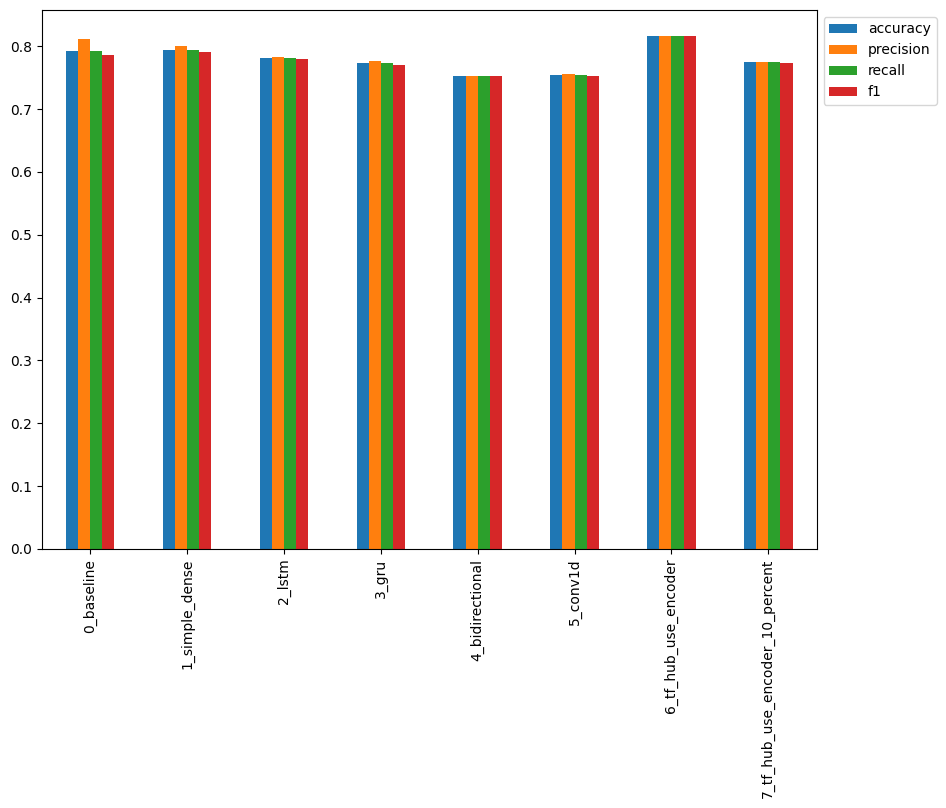

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

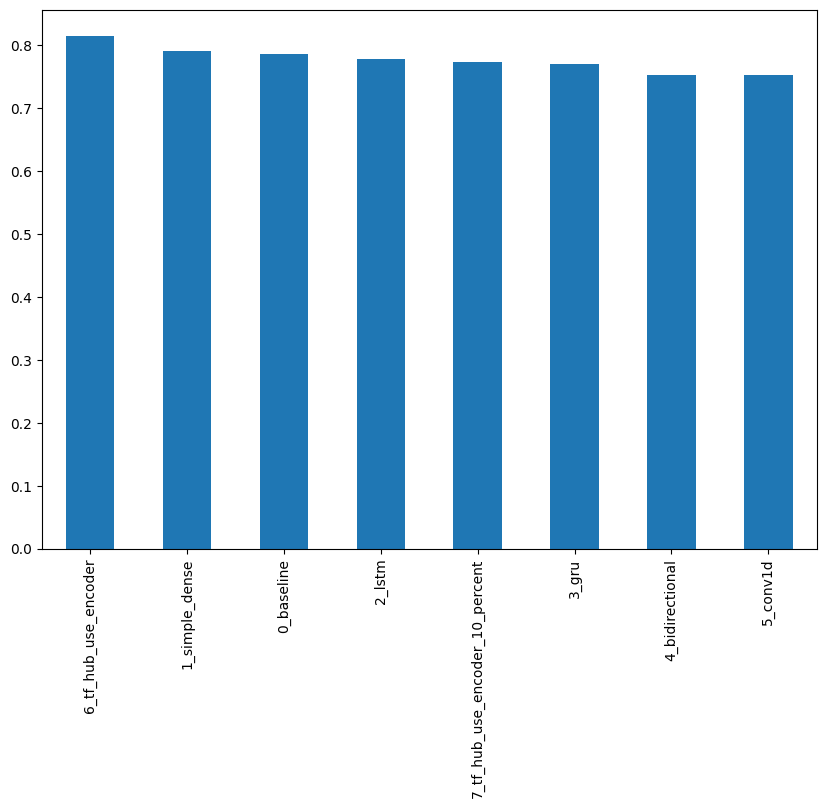

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

## Saving and loading a trained model

There are 2 main formats for saving models in Tensorflow:
1. The HDF5 Format
2. The "SavedModel" format (this is the default when using TensorFlow)

In [ ]:
# Save TF Hub Sentence Encoder Model to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow_hub as hub

In [ ]:
# Load model with custom Hub Layer (required with the HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4237 - accuracy: 0.8163


[0.4236795902252197, 0.8162729740142822]

###How to use Save and Load Model in TensorFlow: https://www.tensorflow.org/tutorials/keras/save_and_load

 Now let's save to the "SavedModel" format


In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

In [ ]:
# Load in a model from the SavedModel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate model in SavedModel format
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4237 - accuracy: 0.8163


[0.4236795902252197, 0.8162729740142822]

## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples, which ones is it getting "most" wrong (Those with prediction probabilities closest to the opposite class)?

For e.g. if a sample should have a label of 0, but our model predicts a predction probability of 0.999 (really close to 1) and vice versa.


In [ ]:
#Download a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

!unzip 08_model_6_USE_feature_extractor.zip

--2023-11-10 15:11:29--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf, 2607:f8b0:4023:c03::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  41.0MB/s    in 17s     

2023-11-10 15:11:47 (53.7 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/va

In [ ]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 12ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# Make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] #These should be in label format

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create a DataFrame with validation sentences, validation labels, and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()


,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10] # These are False Positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong.tail() # These are False Negatives

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


Let's remind ourselves of target labels:

* "0" = Not Disaster
* "1" = Disaster

In [ ]:
# Check the False Positives (model predicted 1 when should've been 0)
for row in most_wrong [:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8769820928573608
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8523001074790955
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Prob: 0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

In [ ]:
# Check the False Negatives (model predicted 0 when should've been 1)
for row in most_wrong [-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.05507583171129227
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.049637261778116226
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0

# Making predictions on the test dataset


In [ ]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # Our model expects a list as input
  pred = tf.round(pred_prob)
  print(f"Pred:{int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")

1/1 [==============================] - 0s 39ms/step
Pred:0, Prob: 0.06737697124481201
Text:
Why are you feeling desolate? Take the quiz: http://t.co/j4lM2ovoOs http://t.co/banrVjoTlf

-----

1/1 [==============================] - 0s 37ms/step
Pred:0, Prob: 0.10249628126621246
Text:
This headache will be the death of me ??

-----

1/1 [==============================] - 0s 34ms/step
Pred:0, Prob: 0.3443135619163513
Text:
A few more photos from this mornings windstorm. We've never seen anything like it! #rhodeisland #warwick

-----

1/1 [==============================] - 0s 38ms/step
Pred:0, Prob: 0.08699587732553482
Text:
Fleshgod Apocalypse - Blinded by Fear (mini drum cover) https://t.co/2PxafIHTf7
this cover is awesome www

-----

1/1 [==============================] - 0s 37ms/step
Pred:0, Prob: 0.3280996084213257
Text:
I crushed a 5.1 mi run with a pace of 13'0' with Nike+ SportWatch GPS. #nikeplus: http://t.co/lJiiuuaTRC

-----

1/1 [==============================] - 0s 41ms/step
Pr

# Speed/Score Tradeoff


In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """

  start_time = time.perf_counter() # get start time
  model.predict(samples) #Make predictions
  end_time = time.perf_counter() #Get finish time
  total_time = end_time-start_time # Calculate how long predictions took to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples=val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 10ms/step


(0.3573115230000212, 0.00046891275984254754)

In [ ]:
# Calculate our baseline model times per pred

baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.017749999999978172, 2.329396325456453e-05)

In [ ]:
# Get results for pretrained GS model
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

Text(0, 0.5, 'F1-score')

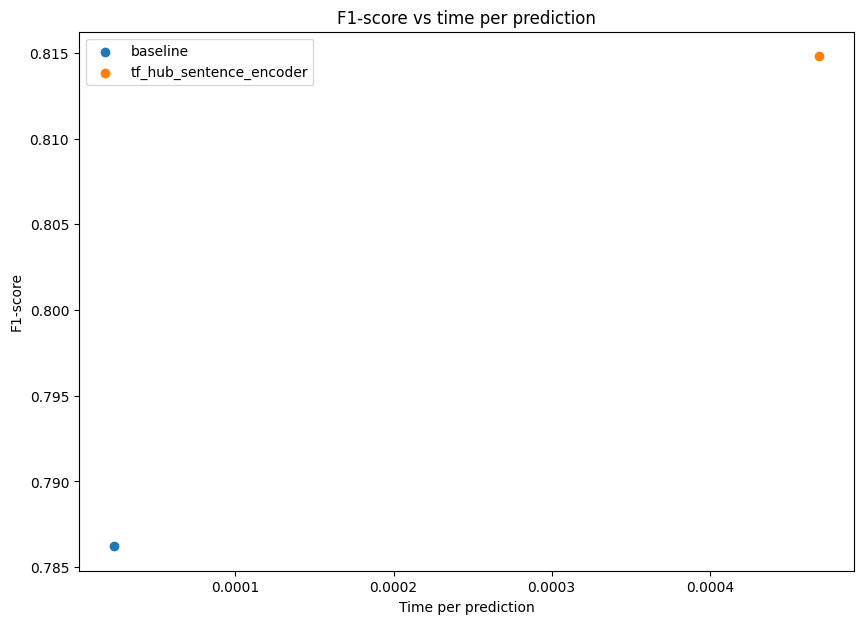

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score vs time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score")
